In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd

In [3]:
mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [4]:
def convert_to_date(x):
    return datetime.strptime(x, '%Y %m %d %H')

In [5]:
# traffic YEAR-2020
traffic = pd.read_csv('X:\RA_AirQuality\Datasets\\traffic\year-2020.csv')
traffic.head()

,COUNTSTATIONID,COUNTDATE,COUNTDIR,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,...,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23,FormattedDate
0,511,20200101,P,1689,1649,1508,1067,1073,1134,1206,...,3141,2976,2825,2390,2187,1920,1764,1297,830,01/01/2020
1,511,20200101,S,1207,1117,881,593,509,743,915,...,3014,2838,2814,2366,2195,1992,1606,1637,1207,01/01/2020
2,511,20200102,P,545,338,369,756,1200,2453,3721,...,4142,3767,3890,3489,2593,2155,1816,1609,1022,01/02/2020
3,511,20200102,S,687,402,350,439,1049,2451,3780,...,2854,2220,2201,3248,2486,2049,1784,1683,1191,01/02/2020
4,511,20200103,P,623,475,487,776,1187,2455,3620,...,4036,3900,3990,3684,2806,2402,2222,1921,1306,01/03/2020


In [6]:
traffic = traffic.drop(columns=["COUNTDATE","COUNTSTATIONID"])

In [7]:
traffic

,COUNTDIR,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,HOUR7,HOUR8,...,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23,FormattedDate
0,P,1689,1649,1508,1067,1073,1134,1206,1369,1753,...,3141,2976,2825,2390,2187,1920,1764,1297,830,01/01/2020
1,S,1207,1117,881,593,509,743,915,1184,1481,...,3014,2838,2814,2366,2195,1992,1606,1637,1207,01/01/2020
2,P,545,338,369,756,1200,2453,3721,3878,3644,...,4142,3767,3890,3489,2593,2155,1816,1609,1022,01/02/2020
3,S,687,402,350,439,1049,2451,3780,3917,3499,...,2854,2220,2201,3248,2486,2049,1784,1683,1191,01/02/2020
4,P,623,475,487,776,1187,2455,3620,3710,3437,...,4036,3900,3990,3684,2806,2402,2222,1921,1306,01/03/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,S,619,301,309,388,685,1710,2880,3050,3069,...,2433,3513,4147,2836,2379,1667,1246,1153,882,12/29/2020
680,P,427,370,370,464,873,2091,3257,3631,3389,...,4389,4309,4095,3294,2626,1841,1183,770,705,12/30/2020
681,S,475,369,328,384,779,1963,3337,3550,3580,...,4160,4088,4153,2801,2287,1718,1506,1309,1034,12/30/2020
682,P,505,379,413,455,655,1727,2948,3152,2808,...,3939,3813,3285,2886,2158,1783,1502,1123,883,12/31/2020


In [8]:
traffic['DateTime'] = pd.to_datetime(traffic.FormattedDate)
traffic.tail()

,COUNTDIR,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,HOUR7,HOUR8,...,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23,FormattedDate,DateTime
679,S,619,301,309,388,685,1710,2880,3050,3069,...,3513,4147,2836,2379,1667,1246,1153,882,12/29/2020,2020-12-29
680,P,427,370,370,464,873,2091,3257,3631,3389,...,4309,4095,3294,2626,1841,1183,770,705,12/30/2020,2020-12-30
681,S,475,369,328,384,779,1963,3337,3550,3580,...,4088,4153,2801,2287,1718,1506,1309,1034,12/30/2020,2020-12-30
682,P,505,379,413,455,655,1727,2948,3152,2808,...,3813,3285,2886,2158,1783,1502,1123,883,12/31/2020,2020-12-31
683,S,584,424,399,400,680,1669,2807,3063,3049,...,4052,3538,2745,2469,1940,1452,1247,954,12/31/2020,2020-12-31


In [9]:
traffic = traffic[['DateTime','COUNTDIR','HOUR0','HOUR1','HOUR2','HOUR3','HOUR4','HOUR5','HOUR6','HOUR7','HOUR8','HOUR9','HOUR10','HOUR11','HOUR12','HOUR13','HOUR14','HOUR15','HOUR16','HOUR17','HOUR18','HOUR19','HOUR20','HOUR21','HOUR22','HOUR23','FormattedDate']]

In [10]:
traffic = traffic.drop(columns=["FormattedDate"])

In [11]:
traffic_non_indexed = traffic

In [12]:
traffic = traffic.set_index('DateTime')

In [13]:
traffic.tail()

,COUNTDIR,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,HOUR7,HOUR8,...,HOUR14,HOUR15,HOUR16,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-12-29,S,619,301,309,388,685,1710,2880,3050,3069,...,4305,2433,3513,4147,2836,2379,1667,1246,1153,882
2020-12-30,P,427,370,370,464,873,2091,3257,3631,3389,...,4161,4389,4309,4095,3294,2626,1841,1183,770,705
2020-12-30,S,475,369,328,384,779,1963,3337,3550,3580,...,4649,4160,4088,4153,2801,2287,1718,1506,1309,1034
2020-12-31,P,505,379,413,455,655,1727,2948,3152,2808,...,4170,3939,3813,3285,2886,2158,1783,1502,1123,883
2020-12-31,S,584,424,399,400,680,1669,2807,3063,3049,...,4423,4395,4052,3538,2745,2469,1940,1452,1247,954


<AxesSubplot:xlabel='DateTime'>

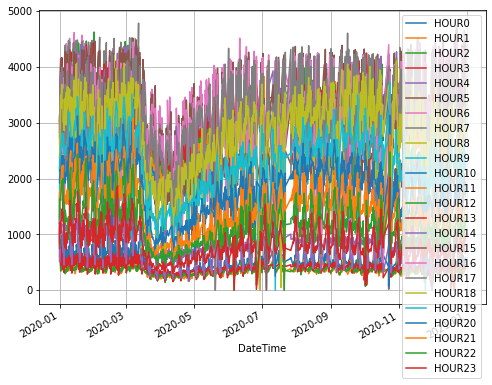

In [14]:
# traffic_data = traffic['HOUR0','HOUR1','HOUR2','HOUR3','HOUR4','HOUR5','HOUR6','HOUR7','HOUR8','HOUR9','HOUR10','HOUR11','HOUR12','HOUR13','HOUR14','HOUR15','HOUR16','HOUR17','HOUR18','HOUR19','HOUR20','HOUR21','HOUR22','HOUR23']
traffic.plot(grid=True)

In [15]:
traffic['year'] = pd.DatetimeIndex(traffic_non_indexed['DateTime']).year

In [16]:
traffic['month'] = pd.DatetimeIndex(traffic_non_indexed['DateTime']).month

In [17]:
traffic['day'] = pd.DatetimeIndex(traffic_non_indexed['DateTime']).day

In [18]:
traffic

,COUNTDIR,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,HOUR7,HOUR8,...,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23,year,month,day
DateTime,,,,,,,,,,,,,,,,,,,,,
2020-01-01,P,1689,1649,1508,1067,1073,1134,1206,1369,1753,...,2825,2390,2187,1920,1764,1297,830,2020,1,1
2020-01-01,S,1207,1117,881,593,509,743,915,1184,1481,...,2814,2366,2195,1992,1606,1637,1207,2020,1,1
2020-01-02,P,545,338,369,756,1200,2453,3721,3878,3644,...,3890,3489,2593,2155,1816,1609,1022,2020,1,2
2020-01-02,S,687,402,350,439,1049,2451,3780,3917,3499,...,2201,3248,2486,2049,1784,1683,1191,2020,1,2
2020-01-03,P,623,475,487,776,1187,2455,3620,3710,3437,...,3990,3684,2806,2402,2222,1921,1306,2020,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-29,S,619,301,309,388,685,1710,2880,3050,3069,...,4147,2836,2379,1667,1246,1153,882,2020,12,29
2020-12-30,P,427,370,370,464,873,2091,3257,3631,3389,...,4095,3294,2626,1841,1183,770,705,2020,12,30
2020-12-30,S,475,369,328,384,779,1963,3337,3550,3580,...,4153,2801,2287,1718,1506,1309,1034,2020,12,30


array([<AxesSubplot:xlabel='DateTime'>], dtype=object)

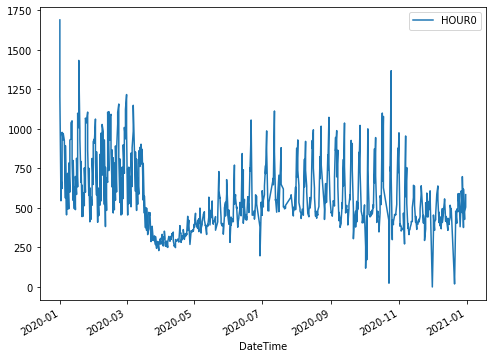

In [19]:
traffic_00=traffic[['HOUR0']]
traffic_00.plot(subplots=True)

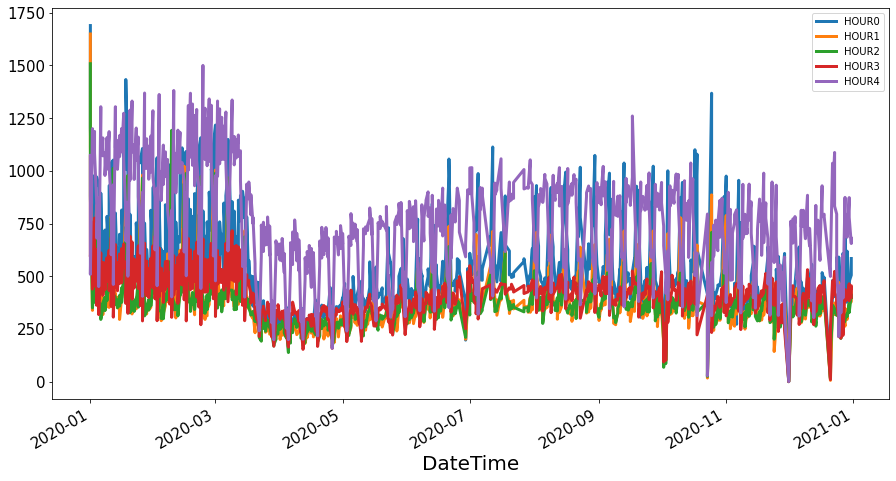

In [54]:
traffic['2020':'2021'][['HOUR0','HOUR1','HOUR2','HOUR3','HOUR4']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

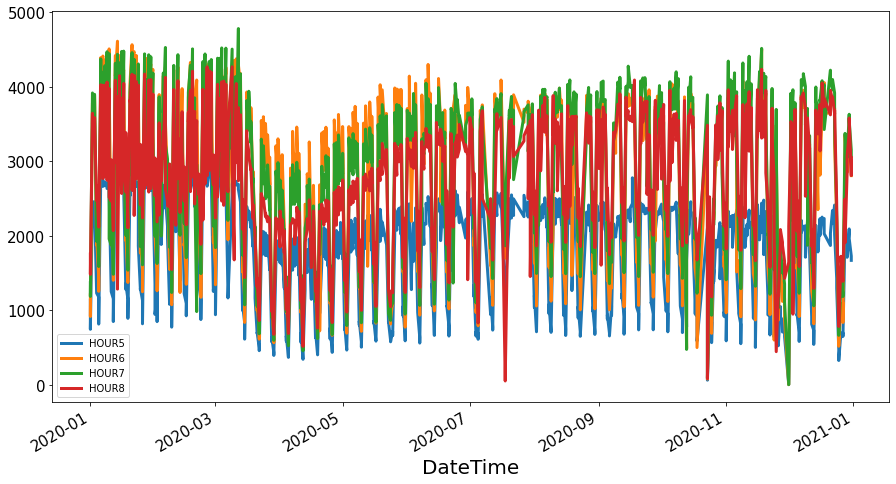

In [47]:
traffic['2020':'2021'][['HOUR5','HOUR6','HOUR7','HOUR8']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

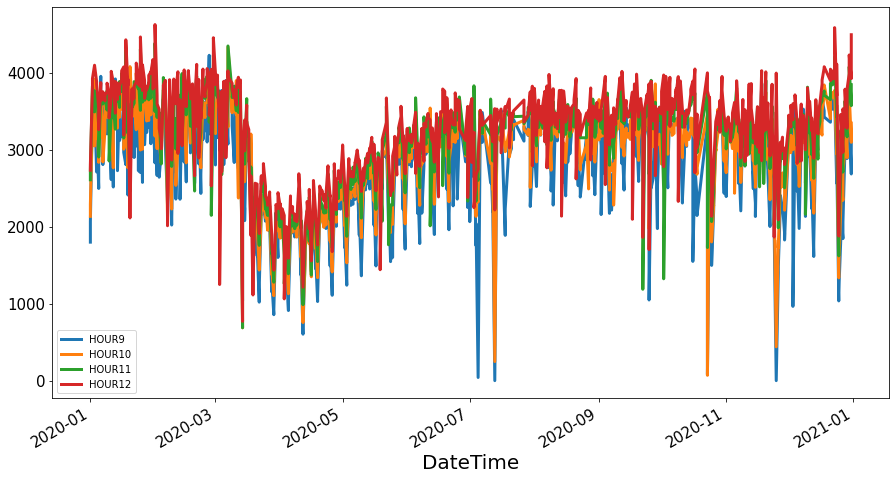

In [48]:
traffic['2020':'2021'][['HOUR9','HOUR10','HOUR11','HOUR12']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

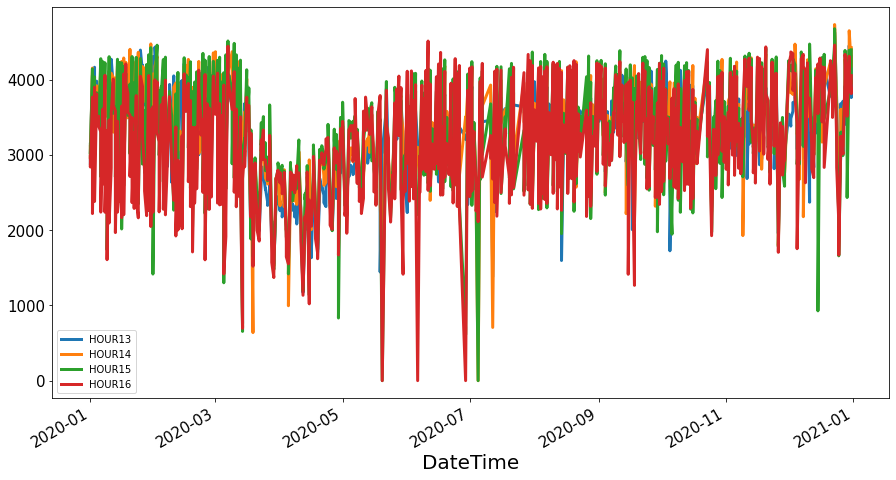

In [49]:
traffic['2020':'2021'][['HOUR13','HOUR14','HOUR15','HOUR16']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

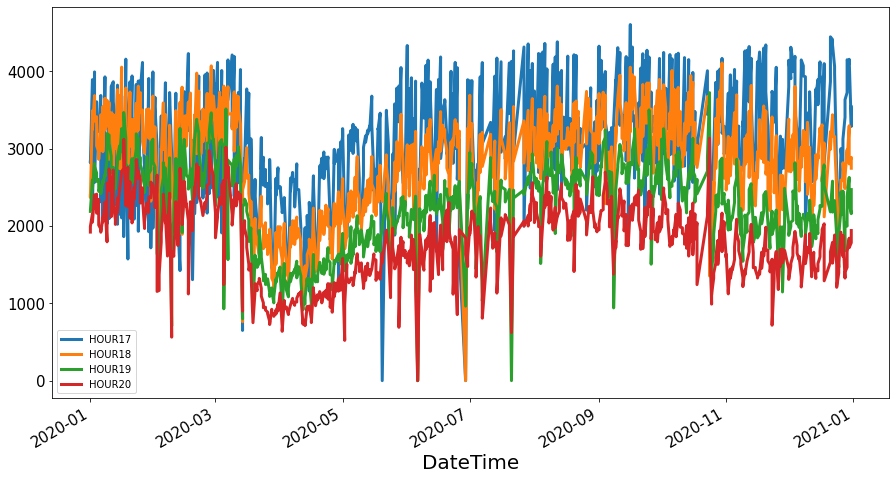

In [50]:
traffic['2020':'2021'][['HOUR17','HOUR18','HOUR19','HOUR20']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

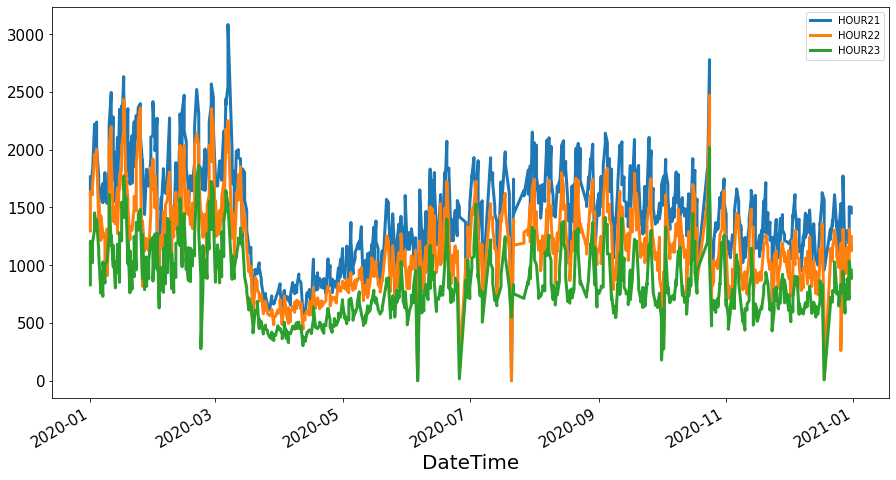

In [51]:
traffic['2020':'2021'][['HOUR21','HOUR22','HOUR23']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

In [37]:
# x = traffic.describe()
# x.to_csv('explore.csv', sep=',')
traffic.describe()

,HOUR0,HOUR1,HOUR2,HOUR3,HOUR4,HOUR5,HOUR6,HOUR7,HOUR8,HOUR9,...,HOUR17,HOUR18,HOUR19,HOUR20,HOUR21,HOUR22,HOUR23,year,month,day
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.00000,...,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.0,684.000000,684.000000
mean,553.954678,390.998538,368.381579,406.643275,747.769006,1792.128655,2836.761696,2856.747076,2733.346491,2778.97076,...,3067.802632,2812.611111,2256.247076,1789.536550,1447.570175,1157.530702,827.817251,2020.0,6.421053,15.435673
std,222.523921,158.148720,132.780764,111.897667,253.754973,722.907948,1171.502850,1051.129890,862.817494,727.16279,...,793.373794,679.407106,587.711881,515.184648,452.120039,392.673452,301.987211,0.0,3.509188,8.879556
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.0,1.000000,1.000000
25%,408.000000,302.750000,303.000000,340.000000,586.000000,1093.250000,1655.250000,1959.250000,2165.250000,2291.75000,...,2601.000000,2383.750000,1897.500000,1432.000000,1134.750000,873.750000,624.000000,2020.0,3.000000,8.000000
50%,493.000000,356.500000,352.000000,404.000000,758.000000,2020.000000,3331.000000,3092.000000,2764.500000,2947.00000,...,3075.000000,2924.500000,2353.000000,1841.000000,1445.500000,1131.500000,780.000000,2020.0,6.000000,15.000000
75%,648.250000,431.000000,400.000000,455.250000,916.250000,2347.750000,3771.000000,3709.250000,3482.500000,3318.25000,...,3719.000000,3303.000000,2680.750000,2172.000000,1749.250000,1399.250000,1028.000000,2020.0,9.000000,23.000000
max,1689.000000,1649.000000,1508.000000,1067.000000,1500.000000,3089.000000,4612.000000,4782.000000,4268.000000,4224.00000,...,4602.000000,4106.000000,3722.000000,3133.000000,3084.000000,2473.000000,2018.000000,2020.0,12.000000,31.000000


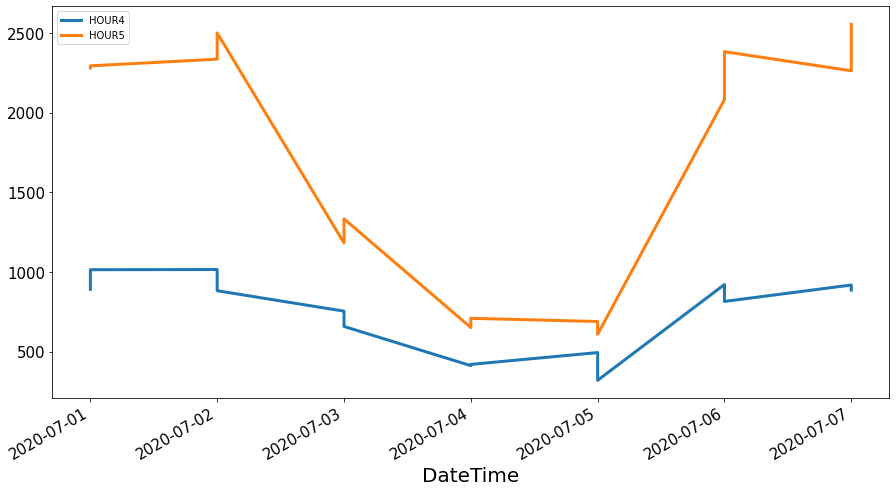

In [62]:
# GENERAL 7/5
traffic['2020-07-01':'2020-07-10'][['HOUR4','HOUR5']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

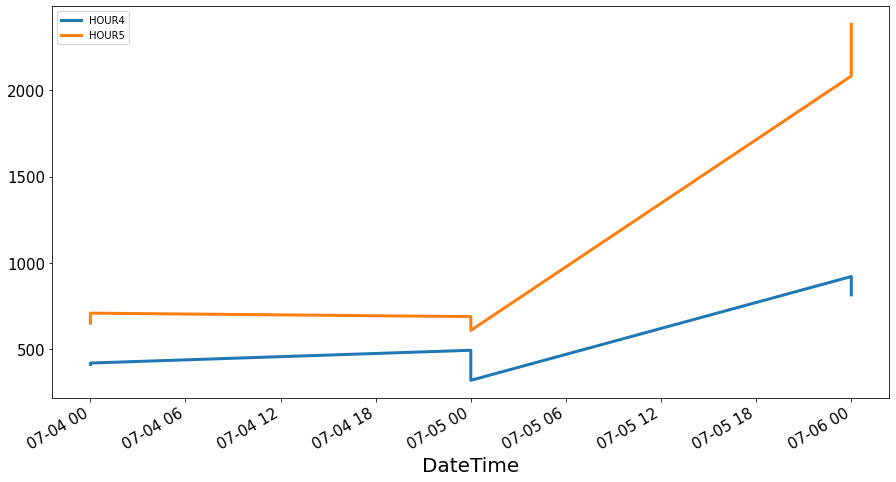

In [64]:
# PRECISE 7/5
traffic['2020-07-04':'2020-07-06'][['HOUR4','HOUR5']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

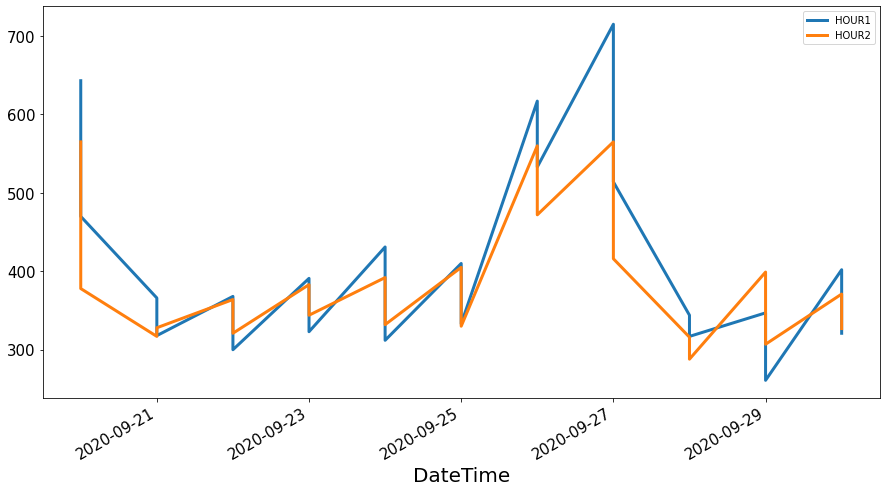

In [63]:
# GENERAL 9/27
traffic['2020-09-20':'2020-09-30'][['HOUR1','HOUR2']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);

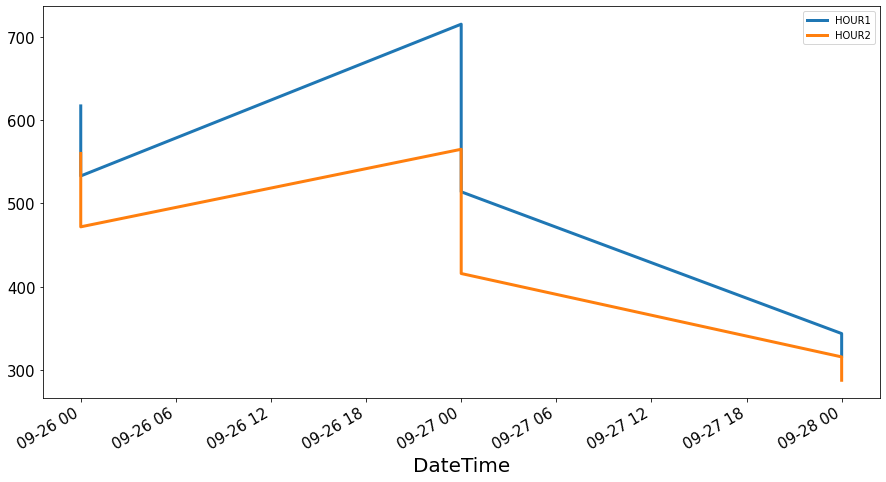

In [65]:
# PRECISE 9/27
traffic['2020-09-26':'2020-09-28'][['HOUR1','HOUR2']].plot(figsize=(15,8), linewidth=3, fontsize=15)
plt.xlabel('DateTime', fontsize=20);